In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.patches as patches

In [2]:
coordinates_data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_data_file = 'coordinates.xlsx'
df = pd.read_excel(f"{coordinates_data_path}/{coordinates_data_file}")
longs = df['Longitude'].values
lats = df['Latitude'].values
colors = ['xkcd:' + df['Color'].values[i] for i in range(0, len(longs))]

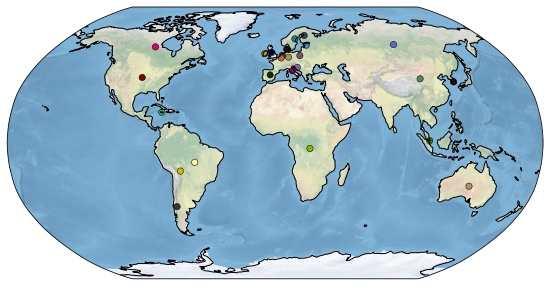

In [4]:
plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs, 
            y=lats, 
            s=40, 
            c=colors,
            edgecolors='k',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
plt.savefig(f'{plot_path}/map_countries.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_countries.pdf', bbox_inches='tight')

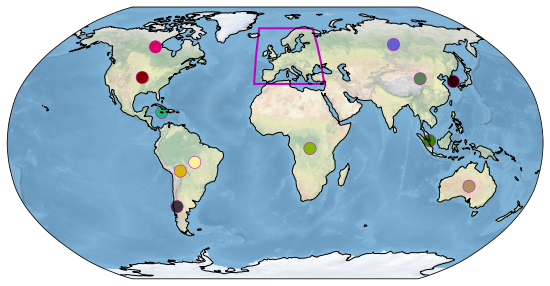

In [5]:
df_non_europe = df.loc[df['Europe'] == False, :]
longs_non_europe = df_non_europe['Longitude'].values
lats_non_europe = df_non_europe['Latitude'].values
colors_non_europe = ['xkcd:' + df_non_europe['Color'].values[i] for i in range(0, len(longs_non_europe))]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs_non_europe, 
            y=lats_non_europe, 
            s=150, 
            c=colors_non_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
ax.add_patch(patches.Rectangle(xy=(-15, 35), width=50, height=35, linewidth=2, facecolor='none', edgecolor='m', transform=ccrs.PlateCarree()))
plt.savefig(f'{plot_path}/map_non_europe.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_non_europe.pdf', bbox_inches='tight')

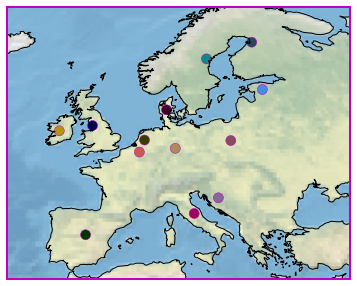

In [22]:
df_europe = df.loc[df['Europe'] == True, :]
longs_europe = df_europe['Longitude'].values
lats_europe = df_europe['Latitude'].values
colors_europe = ['xkcd:' + df_europe['Color'].values[i] for i in range(0, len(longs_europe))]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.set_extent ((-15, 35, 35, 70), ccrs.PlateCarree())
plt.scatter(x=longs_europe, 
            y=lats_europe, 
            s=100,
            c=colors_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())

for spine in ax.spines.values():
    spine.set_edgecolor('m')
    spine.set_linewidth(2)

plt.savefig(f'{plot_path}/map_europe.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_europe.pdf', bbox_inches='tight')

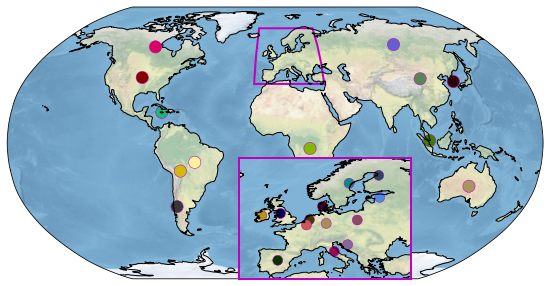

In [40]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs_non_europe, 
            y=lats_non_europe, 
            s=150, 
            c=colors_non_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
ax.add_patch(patches.Rectangle(xy=(-15, 35), width=50, height=35, linewidth=2, facecolor='none', edgecolor='m', transform=ccrs.PlateCarree()))

subax = plt.axes([0, 0, 0.5, 0.5], projection=ccrs.PlateCarree())
subax.stock_img()
subax.coastlines()
subax.set_extent ((-15, 35, 35, 70), ccrs.PlateCarree())
plt.scatter(x=longs_europe, 
            y=lats_europe, 
            s=100,
            c=colors_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())

ax.get_figure().canvas.draw()
p1 = ax.get_position()
p2 = subax.get_position()
subax.set_position([p1.x0+0.9*p2.width, p1.y0, p2.width*0.67, p2.height*0.67])
for spine in subax.spines.values():
    spine.set_edgecolor('m')
    spine.set_linewidth(2)
    
plt.savefig(f'{plot_path}/map.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map.pdf', bbox_inches='tight')